# **Program to download and pre-process North Dakota well data for sub-county analysis**

# **1.a  Download North Dakota monthly production data from DMR ~10min**



In [1]:
import requests
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta


In [9]:
# create list of all yyyy-mm for data download (Note, May 2015 is the first month ND data is available in xlxs)
myList = pd.date_range('2015-04-10',datetime.today()- relativedelta(months=3), freq='MS').strftime("%Y_%m").tolist()  # with month in numeric format

# Access the ND DMR data @ https://www.dmr.nd.gov/oilgas/mprindex.asp
website = "https://www.dmr.nd.gov/oilgas/mpr/"

In [ ]:
# Review the list of monthly data
myList

In [11]:
NDMWD = []  #list()  # North Dakota Monthly Well (NDMWD) Data download process ~ 10 minutes
for month in myList:
    target_url = website + month + '.xlsx'
    print(target_url)
    r = requests.get(target_url)
    wb = pd.read_excel(r.content)
    NDMWD.append(wb)

NDMWD = pd.concat(NDMWD)

https://www.dmr.nd.gov/oilgas/mpr/2015_05.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_06.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_07.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_08.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_09.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_10.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_11.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_12.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_01.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_02.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_03.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_04.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_05.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_06.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_07.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_08.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_09.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_10.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_11.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_12.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2017_01.xlsx
https://www.d

In [12]:
#Create ND monthly well data table in csv format, which can be downloaded from folder on left hand side
NDMWD.to_csv('NDMWD.csv', index=False)

In [13]:
NDMWD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1706085 entries, 0 to 20182
Data columns (total 21 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ReportDate  datetime64[ns]
 1   API_WELLNO  int64         
 2   FileNo      int64         
 3   Company     object        
 4   WellName    object        
 5   Quarter     object        
 6   Section     float64       
 7   Township    float64       
 8   Range       float64       
 9   County      object        
 10  FieldName   object        
 11  Pool        object        
 12  Oil         float64       
 13  Wtr         float64       
 14  Days        float64       
 15  Runs        int64         
 16  Gas         float64       
 17  GasSold     int64         
 18  Flared      float64       
 19  Lat         float64       
 20  Long        float64       
dtypes: datetime64[ns](1), float64(10), int64(4), object(6)
memory usage: 286.4+ MB


# **1.b Extract first month oil and gas produciton data, latitude and longitude**

In [14]:
#NDMWD = pd.read_csv('NDMWD.csv')
NDMWD.drop_duplicates(inplace=True)
NDMWD = NDMWD[NDMWD['Days'] >= 25].reset_index(drop=True)
NDMWD['ReportDate'] = pd.to_datetime(NDMWD['ReportDate'], errors = 'coerce')
NDMWD.tail(2)

,ReportDate,API_WELLNO,FileNo,Company,WellName,Quarter,Section,Township,Range,County,...,Pool,Oil,Wtr,Days,Runs,Gas,GasSold,Flared,Lat,Long
1234977,2023-06-01,33009012640000,6347,EMPIRE NORTH DAKOTA LLC,RICE 2,SENW,26.0,163.0,79.0,BOT,...,SPEARFISH/MADISON,25.0,268.0,30.0,0,0.0,0,0.0,48.917191,-100.876462
1234978,2023-06-01,33009019570000,13685,EMPIRE NORTH DAKOTA LLC,RICE 3,NENW,26.0,163.0,79.0,BOT,...,SPEARFISH/MADISON,51.0,6565.0,30.0,0,0.0,0,0.0,48.920808,-100.877109


In [15]:
ffmWells = NDMWD[['API_WELLNO', 'Pool','ReportDate']].groupby('API_WELLNO').min().rename(columns={'ReportDate':'ffMonth'}).reset_index()
ffmWells.tail(3)

,API_WELLNO,Pool,ffMonth
20439,33105058760000,BAKKEN,2023-05-01
20440,33105061150000,MADISON,2023-06-01
20441,33105903870000,DAKOTA,2018-01-01


In [16]:
ffmWells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20442 entries, 0 to 20441
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   API_WELLNO  20442 non-null  int64         
 1   Pool        20442 non-null  object        
 2   ffMonth     20442 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 479.2+ KB


In [17]:
ffmWells = ffmWells.merge(NDMWD[['API_WELLNO','Pool','ReportDate','Oil','Gas','Wtr','Days','Runs', 'Lat', 'Long']], how='left', left_on=['API_WELLNO','Pool','ffMonth'], right_on = ['API_WELLNO','Pool','ReportDate'])
ffmWells.dropna(inplace=True)
ffmWells.reset_index(drop=True)
ffmWells.tail()

,API_WELLNO,Pool,ffMonth,ReportDate,Oil,Gas,Wtr,Days,Runs,Lat,Long
20437,33105058570000,BAKKEN,2023-05-01,2023-05-01,26701.0,24497.0,64246.0,31.0,26751.0,48.167755,-103.719029
20438,33105058750000,BAKKEN,2023-03-01,2023-03-01,40250.0,31819.0,93444.0,25.0,39436.0,48.169415,-103.699984
20439,33105058760000,BAKKEN,2023-05-01,2023-05-01,31521.0,26441.0,69949.0,31.0,31478.0,48.169418,-103.700107
20440,33105061150000,MADISON,2023-06-01,2023-06-01,938.0,27.0,686.0,30.0,1282.0,48.016557,-103.859187
20441,33105903870000,DAKOTA,2018-01-01,2018-01-01,410.0,0.0,0.0,31.0,946.0,48.404169,-103.475385


In [18]:
ffmWells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20412 entries, 0 to 20441
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   API_WELLNO  20412 non-null  int64         
 1   Pool        20412 non-null  object        
 2   ffMonth     20412 non-null  datetime64[ns]
 3   ReportDate  20412 non-null  datetime64[ns]
 4   Oil         20412 non-null  float64       
 5   Gas         20412 non-null  float64       
 6   Wtr         20412 non-null  float64       
 7   Days        20412 non-null  float64       
 8   Runs        20412 non-null  float64       
 9   Lat         20412 non-null  float64       
 10  Long        20412 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(1)
memory usage: 1.9+ MB


In [19]:
ffmWells.drop('ReportDate', axis=1, inplace=True )
ffmWells['bpd'] =  ffmWells.Oil/ffmWells.Days
ffmWells['Mcfpd'] =  ffmWells.Gas/ffmWells.Days

In [20]:
ffmWells.tail()

,API_WELLNO,Pool,ffMonth,Oil,Gas,Wtr,Days,Runs,Lat,Long,bpd,Mcfpd
20437,33105058570000,BAKKEN,2023-05-01,26701.0,24497.0,64246.0,31.0,26751.0,48.167755,-103.719029,861.322581,790.225806
20438,33105058750000,BAKKEN,2023-03-01,40250.0,31819.0,93444.0,25.0,39436.0,48.169415,-103.699984,1610.000000,1272.760000
20439,33105058760000,BAKKEN,2023-05-01,31521.0,26441.0,69949.0,31.0,31478.0,48.169418,-103.700107,1016.806452,852.935484
20440,33105061150000,MADISON,2023-06-01,938.0,27.0,686.0,30.0,1282.0,48.016557,-103.859187,31.266667,0.900000
20441,33105903870000,DAKOTA,2018-01-01,410.0,0.0,0.0,31.0,946.0,48.404169,-103.475385,13.225806,0.000000


In [21]:
ffmWells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20412 entries, 0 to 20441
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   API_WELLNO  20412 non-null  int64         
 1   Pool        20412 non-null  object        
 2   ffMonth     20412 non-null  datetime64[ns]
 3   Oil         20412 non-null  float64       
 4   Gas         20412 non-null  float64       
 5   Wtr         20412 non-null  float64       
 6   Days        20412 non-null  float64       
 7   Runs        20412 non-null  float64       
 8   Lat         20412 non-null  float64       
 9   Long        20412 non-null  float64       
 10  bpd         20412 non-null  float64       
 11  Mcfpd       20412 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 2.0+ MB


# **1.c Wells latitude and longitude to MHB allocation**

In [22]:
# Maidenhead grid locators courtesy of Walter Underwood K6WRU:
# https://ham.stackexchange.com/questions/221/how-can-one-convert-from-lat-long-to-grid-square


In [23]:
upper = 'ABCDEFGHIJKLMNOPQRSTUVWX'
lower = 'abcdefghijklmnopqrstuvwx'

In [24]:
def gridCalc(row):
    dec_lat = row['Lat']
    dec_lon = row['Long']
    if not (-180<=dec_lon<180):
        sys.stderr.write('longitude must be -180<=lon<180, given %f\n'%dec_lon)
        sys.exit(32)
    if not (-90<=dec_lat<90):
        sys.stderr.write('latitude must be -90<=lat<90, given %f\n'%dec_lat)
        sys.exit(33) # can't handle north pole, sorry, [A-R]

    adj_lat = dec_lat + 90.0
    adj_lon = dec_lon + 180.0

    grid_lat_sq = upper[int(adj_lat/10)];
    grid_lon_sq = upper[int(adj_lon/20)];

    grid_lat_field = str(int(adj_lat%10))
    grid_lon_field = str(int((adj_lon/2)%10))

    adj_lat_remainder = (adj_lat - int(adj_lat)) * 60
    adj_lon_remainder = ((adj_lon) - int(adj_lon/2)*2) * 60

    grid_lat_subsq = lower[int(adj_lat_remainder/2.5)]
    grid_lon_subsq = lower[int(adj_lon_remainder/5)]

    return grid_lon_sq + grid_lat_sq + grid_lon_field + grid_lat_field + grid_lon_subsq + grid_lat_subsq

In [25]:
ffmWells['MHB'] = ffmWells.apply(gridCalc, axis=1)

In [26]:
ffmWells.tail()

,API_WELLNO,Pool,ffMonth,Oil,Gas,Wtr,Days,Runs,Lat,Long,bpd,Mcfpd,MHB
20437,33105058570000,BAKKEN,2023-05-01,26701.0,24497.0,64246.0,31.0,26751.0,48.167755,-103.719029,861.322581,790.225806,DN88de
20438,33105058750000,BAKKEN,2023-03-01,40250.0,31819.0,93444.0,25.0,39436.0,48.169415,-103.699984,1610.000000,1272.760000,DN88de
20439,33105058760000,BAKKEN,2023-05-01,31521.0,26441.0,69949.0,31.0,31478.0,48.169418,-103.700107,1016.806452,852.935484,DN88de
20440,33105061150000,MADISON,2023-06-01,938.0,27.0,686.0,30.0,1282.0,48.016557,-103.859187,31.266667,0.900000,DN88ba
20441,33105903870000,DAKOTA,2018-01-01,410.0,0.0,0.0,31.0,946.0,48.404169,-103.475385,13.225806,0.000000,DN88gj


In [27]:
ffmWells.to_csv('ffmWells.csv', index=False)

# **2.a Download well bore data from ND DMR ~5min**

In [28]:
!pip install dbfread

In [29]:
import pandas as pd
import plotly.express as px
from dbfread import DBF
import ipywidgets as widgets
import csv
from math import radians, sin, cos, sqrt, atan2

In [30]:
# run command to download data.  In case it is not able to download, open the link and upload the data to this notebook from left hand side menu.
!wget https://gis.dmr.nd.gov/downloads/oilgas/shapefile/OGD_Horizontals.zip

--2023-09-08 18:37:57--  https://gis.dmr.nd.gov/downloads/oilgas/shapefile/OGD_Horizontals.zip
Resolving gis.dmr.nd.gov (gis.dmr.nd.gov)... 165.234.156.197
Connecting to gis.dmr.nd.gov (gis.dmr.nd.gov)|165.234.156.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314193504 (300M) [application/x-zip-compressed]
Saving to: ‘OGD_Horizontals.zip’

OGD_Horizontals.zip 100%[===================>] 299.64M  34.0MB/s    in 8.4s    

2023-09-08 18:38:06 (35.8 MB/s) - ‘OGD_Horizontals.zip’ saved [314193504/314193504]



In [31]:
!unzip OGD_Horizontals.zip

Archive:  OGD_Horizontals.zip
  inflating: OGD_Horizontals.cpg     
  inflating: OGD_Horizontals.dbf     
  inflating: OGD_Horizontals.prj     
  inflating: OGD_Horizontals.sbn     
  inflating: OGD_Horizontals.sbx     
  inflating: OGD_Horizontals.shp     
  inflating: OGD_Horizontals.shp.xml  
  inflating: OGD_Horizontals.shx     
  inflating: OGD_Horizontals_Line.cpg  
  inflating: OGD_Horizontals_Line.dbf  
  inflating: OGD_Horizontals_Line.prj  
  inflating: OGD_Horizontals_Line.sbn  
  inflating: OGD_Horizontals_Line.sbx  
  inflating: OGD_Horizontals_Line.shp  
  inflating: OGD_Horizontals_Line.shp.xml  
  inflating: OGD_Horizontals_Line.shx  


In [32]:
# to write OGD_Horizontals.dbf to csv file ~ 2 minutes
filename= 'OGD_Horizontals.dbf'
table = DBF(filename)
f=open('ndWells.csv', 'w')
writer = csv.writer(f)
writer.writerow(table.field_names)
for record in table:
  writer.writerow(list(record.values()))

In [33]:
dfWells = pd.read_csv('ndWells.csv')
dfWells.head(3)

,wl_permit,api_wellno,api_format,long,lat,well_sub,measdpth,inclinatio,azimuth,tvd,coordns,coordnsdir,coordew,coordewdir,surveytype
0,1741,33007000260000,33-007-00026-00-00,-103.392973,46.866931,LAT1,9000.0,0.77,4.33,8999.030273,38.310001,N,35.090000,W,STP
1,1741,33007000260000,33-007-00026-00-00,-103.392971,46.866931,LAT1,9015.0,3.30,88.00,9014.021484,38.425602,N,34.650803,W,SPT
2,1741,33007000260000,33-007-00026-00-00,-103.392969,46.866931,LAT1,9022.0,5.30,88.00,9021.000977,38.443920,N,34.126297,W,SPT


# **2.b Filter out first laterals and estimate lateral length**

In [34]:
dfWells['myLateral'] = ['1stLat' if x=='LAT1' else '1stLat' if x=='STK1' else 'VERT' if x=='VERT' else 'othLat' for x in dfWells['well_sub']]
dfWells.tail(3)

,wl_permit,api_wellno,api_format,long,lat,well_sub,measdpth,inclinatio,azimuth,tvd,coordns,coordnsdir,coordew,coordewdir,surveytype,myLateral
4885420,90466,33105904660000,33-105-90466-00-00,-103.411653,48.287810,VERT,4319.0,0.2,134.399994,4318.772949,7.135031,S,14.252914,W,SPT,VERT
4885421,90466,33105904660000,33-105-90466-00-00,-103.411653,48.287810,VERT,4415.0,0.2,14.500000,4414.772461,7.090045,S,14.091251,W,SPT,VERT
4885422,90466,33105904660000,33-105-90466-00-00,-103.411652,48.287812,VERT,4511.0,0.3,7.600000,4510.771484,6.678713,S,14.016061,W,SPT,VERT


In [35]:
flWells = dfWells.groupby(['api_wellno','myLateral']).agg(latMin=('lat', 'min'),latMax=('lat', 'max'),
                                                        longMin=('long', 'min'),longMax=('long', 'max'),
                                                        tvdMin=('tvd', 'min'),tvdMax=('tvd', 'max')).reset_index()

In [36]:
def latft(latMin, latMax, longMin, longMax):

    R = 20925721

    lat1 = radians(latMin)
    lon1 = radians(longMin)
    lat2 = radians(latMax)
    lon2 = radians(longMax)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    #print("latL_km:", distance)
    return distance

In [37]:
flWells['totll'] = flWells.apply(lambda row: latft(row['latMin'],row['latMax'],row['longMin'],row['longMax']),  axis=1)

In [53]:
flWellsOnly = flWells[['api_wellno','myLateral','totll']][flWells['myLateral'] == '1stLat'].reset_index(drop=True)
flWellsOnly.tail()

,api_wellno,myLateral,totll
19958,33105060500000,1stLat,10745.854055
19959,33105060730000,1stLat,545.682062
19960,33105902990000,1stLat,2102.817016
19961,33105904500000,1stLat,1787.417830
19962,33105904660000,1stLat,2305.694952


In [54]:
flWellsOnly[['api_wellno','myLateral','totll']].to_csv('flWellsOnly.csv', index=False)

In [40]:
flWells[flWells['api_wellno']==33105040690000]

,api_wellno,myLateral,latMin,latMax,longMin,longMax,tvdMin,tvdMax,totll
37356,33105040690000,1stLat,48.282229,48.282416,-102.980406,-102.979728,7251.502930,8439.927734,178.459657
37357,33105040690000,VERT,48.282314,48.282738,-102.983372,-102.979511,1768.457642,8985.621094,951.301084


In [41]:
## 3D plot of specific well to verify estimation
plWell = dfWells[['api_wellno','lat','long','tvd','well_sub']][dfWells['api_wellno'] == 33105040690000]

In [42]:
fig = px.scatter_3d(plWell, x='long', y='lat', z='tvd', color='well_sub')
fig.update_traces(marker_size = 3)
fig.update_scenes(yaxis_autorange="reversed")
fig.update_scenes(xaxis_autorange="reversed")
fig.update_scenes(zaxis_range=[16000, 0])
fig.update_layout({
    'plot_bgcolor': 'rgba(100, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
                      })

# **3.a Download and unzip FracFocus.org well completion data ~5min**

In [43]:
import pandas as pd
import requests
import zipfile
import io
import datetime

In [44]:
link2FFcsvZip = 'http://fracfocusdata.org/digitaldownload/FracFocusCSV.zip'

In [57]:
request = requests.get(link2FFcsvZip)
zipBag = zipfile.ZipFile(io.BytesIO(request.content))

In [58]:
zipFiles = zipBag.namelist()
zipFiles

['FracFocusRegistry_1.csv',
 'FracFocusRegistry_10.csv',
 'FracFocusRegistry_11.csv',
 'FracFocusRegistry_12.csv',
 'FracFocusRegistry_13.csv',
 'FracFocusRegistry_14.csv',
 'FracFocusRegistry_15.csv',
 'FracFocusRegistry_16.csv',
 'FracFocusRegistry_17.csv',
 'FracFocusRegistry_18.csv',
 'FracFocusRegistry_19.csv',
 'FracFocusRegistry_2.csv',
 'FracFocusRegistry_20.csv',
 'FracFocusRegistry_21.csv',
 'FracFocusRegistry_22.csv',
 'FracFocusRegistry_23.csv',
 'FracFocusRegistry_24.csv',
 'FracFocusRegistry_25.csv',
 'FracFocusRegistry_3.csv',
 'FracFocusRegistry_4.csv',
 'FracFocusRegistry_5.csv',
 'FracFocusRegistry_6.csv',
 'FracFocusRegistry_7.csv',
 'FracFocusRegistry_8.csv',
 'FracFocusRegistry_9.csv',
 'readme.txt',
 'registryupload_1.csv',
 'registryupload_2.csv',
 'registryupload_3.csv']

In [59]:
#Unzip files and create corresponding dataframes
RegistryUpload_files=[]
FracFocusRegistry_files=[]

In [60]:
for file_name in zipFiles:
    if (('registryupload' in file_name)) & (file_name.endswith('.csv')):
        RegistryUpload_files.append(file_name)
    if (('FracFocusRegistry' in file_name)) & (file_name.endswith('.csv')):
        FracFocusRegistry_files.append(file_name)

In [61]:
RegistryUpload_files

['registryupload_1.csv', 'registryupload_2.csv', 'registryupload_3.csv']

In [62]:
dfs = list()
for file_name in RegistryUpload_files:
    df = pd.read_csv(zipBag.open(file_name), low_memory=False, dtype={'APINumber': 'str','StateNumber': 'str', 'CountyNumber': 'str'})
    dfs.append(df)

RegistryUpload = pd.concat(dfs, axis=0, ignore_index=True)
RegistryUpload.head(2)

,pKey,JobStartDate,JobEndDate,APINumber,StateNumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,...,TVD,TotalBaseWaterVolume,TotalBaseNonWaterVolume,StateName,CountyName,FFVersion,FederalWell,IndianWell,Source,DTMOD
0,448c1dab-c7fd-4e07-9d6f-e3b1cf64b708,5/1/1955 12:00:00 AM,5/1/1955 12:00:00 AM,42317372620000,42,317,Pioneer Natural Resources,Rogers 42 #5,32.283431,-101.906575,...,NaN,NaN,NaN,Texas,Martin,1,False,False,NaN,NaN
1,f66add2e-8ea8-4843-9388-24725b5d37c1,5/19/1982 12:00:00 AM,5/19/1982 12:00:00 AM,49009219470000,49,009,"Chesapeake Operating, Inc.",WILLIAM VALENTINE 1,42.972810,-105.953840,...,NaN,NaN,NaN,WYOMING,CONVERSE,1,False,False,NaN,NaN


In [63]:
RegistryUpload.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211382 entries, 0 to 211381
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   pKey                     211382 non-null  object 
 1   JobStartDate             211367 non-null  object 
 2   JobEndDate               211382 non-null  object 
 3   APINumber                211382 non-null  object 
 4   StateNumber              211382 non-null  object 
 5   CountyNumber             211382 non-null  object 
 6   OperatorName             211382 non-null  object 
 7   WellName                 211382 non-null  object 
 8   Latitude                 211382 non-null  float64
 9   Longitude                211382 non-null  float64
 10  Projection               211382 non-null  object 
 11  TVD                      181242 non-null  float64
 12  TotalBaseWaterVolume     181213 non-null  float64
 13  TotalBaseNonWaterVolume  161099 non-null  float64
 14  Stat

In [64]:
FracFocusRegistry_files

['FracFocusRegistry_1.csv',
 'FracFocusRegistry_10.csv',
 'FracFocusRegistry_11.csv',
 'FracFocusRegistry_12.csv',
 'FracFocusRegistry_13.csv',
 'FracFocusRegistry_14.csv',
 'FracFocusRegistry_15.csv',
 'FracFocusRegistry_16.csv',
 'FracFocusRegistry_17.csv',
 'FracFocusRegistry_18.csv',
 'FracFocusRegistry_19.csv',
 'FracFocusRegistry_2.csv',
 'FracFocusRegistry_20.csv',
 'FracFocusRegistry_21.csv',
 'FracFocusRegistry_22.csv',
 'FracFocusRegistry_23.csv',
 'FracFocusRegistry_24.csv',
 'FracFocusRegistry_25.csv',
 'FracFocusRegistry_3.csv',
 'FracFocusRegistry_4.csv',
 'FracFocusRegistry_5.csv',
 'FracFocusRegistry_6.csv',
 'FracFocusRegistry_7.csv',
 'FracFocusRegistry_8.csv',
 'FracFocusRegistry_9.csv']

In [65]:
dfs = list()
for file_name in FracFocusRegistry_files:
    df = pd.read_csv(zipBag.open(file_name), low_memory=False, dtype={'APINumber': 'str','StateNumber': 'str', 'CountyNumber': 'str'})
    dfs.append(df)

FracFocusRegistry = pd.concat(dfs, axis=0, ignore_index=True)
FracFocusRegistry.head(2)

,UploadKey,JobStartDate,JobEndDate,APINumber,StateNumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,...,IngredientKey,IngredientName,CASNumber,PercentHighAdditive,PercentHFJob,IngredientComment,IngredientMSDS,MassIngredient,ClaimantCompany,DisclosureKey
0,448c1dab-c7fd-4e07-9d6f-e3b1cf64b708,5/1/1955 12:00:00 AM,5/1/1955 12:00:00 AM,42317372620000,42,317,Pioneer Natural Resources,Rogers 42 #5,32.283431,-101.906575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,448c1dab-c7fd-4e07-9d6f-e3b1cf64b708,5/1/1955 12:00:00 AM,5/1/1955 12:00:00 AM,42317372620000,42,317,Pioneer Natural Resources,Rogers 42 #5,32.283431,-101.906575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
FracFocusRegistry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071576 entries, 0 to 6071575
Data columns (total 39 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   UploadKey                object 
 1   JobStartDate             object 
 2   JobEndDate               object 
 3   APINumber                object 
 4   StateNumber              object 
 5   CountyNumber             object 
 6   OperatorName             object 
 7   WellName                 object 
 8   Latitude                 float64
 9   Longitude                float64
 10  Projection               object 
 11  TVD                      float64
 12  TotalBaseWaterVolume     float64
 13  TotalBaseNonWaterVolume  float64
 14  StateName                object 
 15  CountyName               object 
 16  FFVersion                int64  
 17  FederalWell              bool   
 18  IndianWell               bool   
 19  Source                   float64
 20  DTMOD                    float64
 21  PurposeK

# **3.b Estimate water and sand used in copletions of ND wells only**

In [67]:
# Filter out ND wells and list water used in completions
ffWellsND = RegistryUpload[['pKey','APINumber','JobEndDate','TotalBaseWaterVolume']][RegistryUpload['StateNumber']== '33'].reset_index(drop=True)
ffWellsND['JobEndDate'] = pd.to_datetime(ffWellsND['JobEndDate'], errors = 'coerce').dt.date
ffWellsND.tail()

,pKey,APINumber,JobEndDate,TotalBaseWaterVolume
16108,bed265ca-f4ab-4307-86c9-76a31d2e06b1,33061051230000,2023-08-14,10222700.0
16109,526e6ef0-bc64-40e6-864c-2a22e406da99,33061051240000,2023-08-14,10225540.0
16110,f79f6237-30f0-43bd-af83-715458dd2265,33061051250000,2023-08-14,10247892.0
16111,050e7b83-b8f1-4a60-a729-99cffe2dae6e,33061051410000,2023-08-23,9756281.0
16112,5ecae102-b645-4185-adbf-4a30bf42dbb6,33061051400000,2023-08-23,9746429.0


In [68]:
#Filter out sand used during completions
swData = FracFocusRegistry[['UploadKey','APINumber','JobEndDate','IngredientName','Purpose','TradeName','MassIngredient','PercentHFJob','IngredientKey','TotalBaseWaterVolume']][FracFocusRegistry['StateNumber']== '33'].reset_index(drop=True)
swData['JobEndDate'] = pd.to_datetime(swData['JobEndDate'], errors = 'coerce').dt.date

In [69]:
tnWords = ['sand','mesh','proppant','ceramic','quartz','silica','crystalline']
swDataFilter = swData[swData['TradeName'].str.contains('|'.join(tnWords), case=False, na=False, regex = True)].copy().reset_index(drop=True)
swDataFilter.tail(2)

,UploadKey,APINumber,JobEndDate,IngredientName,Purpose,TradeName,MassIngredient,PercentHFJob,IngredientKey,TotalBaseWaterVolume
44542,8607b4f6-3380-42dd-8ec8-a396d01fd988,33053061280000,2015-04-02,"Crystalline silica, quartz",Proppant,SAND - PREMIUM WHITE,7363600.0,13.596038,ad1a2155-6dfd-40a9-96e1-189eb344478e,5377176.0
44543,8607b4f6-3380-42dd-8ec8-a396d01fd988,33053061280000,2015-04-02,"Crystalline silica, quartz",Proppant,SAND - COMMON WHITE,1805900.0,3.334386,93c1b66d-f3f6-45a0-b17d-9aa939f357df,5377176.0


In [70]:
exclusionList = ['water','transport','acid','stabilizer','carrier','clay','ammonium','chloride','Potassium','KCL','chlorine','naphtha','petroleum','aromatic','surfactant','alcohol','gum','tetrahydrate','carbonate','glycol']
swDataFilter = swDataFilter[~swDataFilter['TradeName'].str.contains('|'.join(exclusionList), case=False, na=False)].copy().reset_index(drop=True)
swDataFilter.tail(2)

,UploadKey,APINumber,JobEndDate,IngredientName,Purpose,TradeName,MassIngredient,PercentHFJob,IngredientKey,TotalBaseWaterVolume
25416,8607b4f6-3380-42dd-8ec8-a396d01fd988,33053061280000,2015-04-02,"Crystalline silica, quartz",Proppant,SAND - PREMIUM WHITE,7363600.0,13.596038,ad1a2155-6dfd-40a9-96e1-189eb344478e,5377176.0
25417,8607b4f6-3380-42dd-8ec8-a396d01fd988,33053061280000,2015-04-02,"Crystalline silica, quartz",Proppant,SAND - COMMON WHITE,1805900.0,3.334386,93c1b66d-f3f6-45a0-b17d-9aa939f357df,5377176.0


In [71]:
#Estimate mass from PercentHFJob
swDataFilter['derWeight'] = swDataFilter['TotalBaseWaterVolume']*.0935*swDataFilter['PercentHFJob']

In [72]:
def weightCondition(s):
    if (s['MassIngredient'] > 0):
        return s['MassIngredient']
    else:
        return s['derWeight']

In [73]:
swDataFilter['bestWeight'] = swDataFilter.apply(weightCondition, axis=1)

In [74]:
SandUsed = swDataFilter[['UploadKey','APINumber','JobEndDate','bestWeight']].groupby(['UploadKey','APINumber','JobEndDate']).sum().rename(columns={'bestWeight':'SandLB'}).reset_index()

In [76]:
SandUsed = SandUsed[SandUsed['SandLB'] > 0]
SandUsed.reset_index(drop=True, inplace=True)
SandUsed.tail()

,UploadKey,APINumber,JobEndDate,SandLB
7767,ffeb8d65-66a6-47e5-835e-b002806305bc,33053091850000,2023-01-12,4.738717e+06
7768,ffef3fcc-9185-41d6-85e0-ea992071237f,33053084960000,2018-08-22,7.154146e+06
7769,fff39d2a-da18-432b-899f-012837eef9b6,33053091710000,2020-08-23,1.304442e+07
7770,fff9db51-a9e1-4698-b29d-9ff597aae7fd,33025036880000,2021-04-05,7.992000e+06
7771,fffb8798-b804-447b-856f-cde632d7bb7d,33061038180000,2017-04-30,1.367250e+07


In [77]:
#Merge water and sand used during completions
ffWellsND = ffWellsND.merge(SandUsed[['UploadKey','SandLB']], how='left', left_on = 'pKey', right_on = 'UploadKey' )

In [78]:
ffWellsND.drop(['pKey','UploadKey'], axis=1, inplace=True)

In [90]:
#Filter out first frac jobs
ffWellsND = ffWellsND.sort_values(['APINumber','JobEndDate']).reset_index(drop = True)
ffWellsND["sfID"] = ffWellsND.groupby(['APINumber']).cumcount()
ffWellsND = ffWellsND[ffWellsND['sfID']==0].reset_index(drop = True)  # filters out refrac jobs, keeps only the first frac jobs
ffWellsND.drop('sfID', inplace=True, axis=1)
ffWellsND.rename({'TotalBaseWaterVolume': 'WaterGal'}, axis=1, inplace=True)
ffWellsND["APINumber"] = ffWellsND["APINumber"].astype(int)
ffWellsND.tail()

,APINumber,JobEndDate,WaterGal,SandLB
15153,33105059720000,2023-05-06,11151006.72,NaN
15154,33105059730000,2023-05-06,10978190.58,NaN
15155,33105121850000,2012-02-24,NaN,NaN
15156,33610338000000,2022-06-08,13496802.00,10357262.37
15157,33610338100000,2022-06-09,14820967.00,11223894.87


In [80]:
ffWellsND.to_csv('ffWellsND.csv', index=False)
ffWellsND.tail()

,APINumber,JobEndDate,WaterGal,SandLB
15153,33105059720000,2023-05-06,11151006.72,NaN
15154,33105059730000,2023-05-06,10978190.58,NaN
15155,33105121850000,2012-02-24,NaN,NaN
15156,33610338000000,2022-06-08,13496802.00,10357262.37
15157,33610338100000,2022-06-09,14820967.00,11223894.87


# **4. Combine files and write data file for Sub-county analysis**

In [81]:
# In disagregated form, read the files from previously derived csv files
#ffmWells = pd.read_csv('ffmWells.csv')
#flWellsOnly = pd.read_csv('flWellsOnly.csv')
#ffWellsND = pd.read_csv('ffWellsND.csv')

In [82]:
ND_Data = ffmWells[['API_WELLNO','Pool','ffMonth','bpd','Mcfpd','MHB']].merge(flWellsOnly, how = 'left', left_on = 'API_WELLNO', right_on = 'api_wellno')
ND_Data.drop(['api_wellno','myLateral'], axis=1, inplace=True)
ND_Data.columns = ['API14', 'Pool', 'feDate', 'maxPo', 'maxPg','MHB','LL']
ND_Data.tail()

,API14,Pool,feDate,maxPo,maxPg,MHB,LL
20407,33105058570000,BAKKEN,2023-05-01,861.322581,790.225806,DN88de,10753.179882
20408,33105058750000,BAKKEN,2023-03-01,1610.000000,1272.760000,DN88de,10729.605131
20409,33105058760000,BAKKEN,2023-05-01,1016.806452,852.935484,DN88de,10727.102474
20410,33105061150000,MADISON,2023-06-01,31.266667,0.900000,DN88ba,NaN
20411,33105903870000,DAKOTA,2018-01-01,13.225806,0.000000,DN88gj,NaN


In [92]:
ND_Data = ND_Data.merge(ffWellsND, how = 'left', left_on = 'API14', right_on = 'APINumber')
ND_Data.tail()

,API14,Pool,feDate,maxPo,maxPg,MHB,LL,APINumber,JobEndDate,WaterGal,SandLB
20407,33105058570000,BAKKEN,2023-05-01,861.322581,790.225806,DN88de,10753.179882,3.310506e+13,2023-01-27,11088845.0,10028631.33
20408,33105058750000,BAKKEN,2023-03-01,1610.000000,1272.760000,DN88de,10729.605131,3.310506e+13,2023-02-15,10865393.0,10498341.15
20409,33105058760000,BAKKEN,2023-05-01,1016.806452,852.935484,DN88de,10727.102474,3.310506e+13,2023-02-15,10332110.0,10058611.32
20410,33105061150000,MADISON,2023-06-01,31.266667,0.900000,DN88ba,NaN,NaN,NaN,NaN,NaN
20411,33105903870000,DAKOTA,2018-01-01,13.225806,0.000000,DN88gj,NaN,NaN,NaN,NaN,NaN


In [93]:
#Drop wells with missing values
ND_Data.dropna(inplace=True)
ND_Data.reset_index(inplace=True, drop=True)
ND_Data.tail()

,API14,Pool,feDate,maxPo,maxPg,MHB,LL,APINumber,JobEndDate,WaterGal,SandLB
6979,33105058550000,BAKKEN,2023-03-01,651.892857,557.142857,DN88de,10210.408035,3.310506e+13,2023-01-27,12016673.0,11317940.73
6980,33105058560000,BAKKEN,2023-03-01,795.354839,684.580645,DN88de,10717.767091,3.310506e+13,2023-01-27,12593303.0,11893604.49
6981,33105058570000,BAKKEN,2023-05-01,861.322581,790.225806,DN88de,10753.179882,3.310506e+13,2023-01-27,11088845.0,10028631.33
6982,33105058750000,BAKKEN,2023-03-01,1610.000000,1272.760000,DN88de,10729.605131,3.310506e+13,2023-02-15,10865393.0,10498341.15
6983,33105058760000,BAKKEN,2023-05-01,1016.806452,852.935484,DN88de,10727.102474,3.310506e+13,2023-02-15,10332110.0,10058611.32


In [101]:
ND_Bakken = ND_Data[ND_Data['Pool']=='BAKKEN']  #Filter out Bakken wells only
ND_Bakken = ND_Bakken[ND_Bakken['feDate']>'2015-06-01'].reset_index(drop = True)  #Filter out first two month to eliminate wells that started before data is available
ND_Bakken

,API14,Pool,feDate,maxPo,maxPg,MHB,LL,APINumber,JobEndDate,WaterGal,SandLB
0,33007017390000,BAKKEN,2018-03-01,21.400000,10.760000,DN87kg,9988.611253,3.300702e+13,2013-06-14,1519434.0,100331.00
1,33007017630000,BAKKEN,2015-07-01,243.903226,384.000000,DN86iw,11573.584346,3.300702e+13,2015-01-30,8957550.0,5276217.00
2,33007017970000,BAKKEN,2015-08-01,1.833333,8.300000,DN87ke,9962.164000,3.300702e+13,2013-09-01,422625.0,222478.00
3,33007018050000,BAKKEN,2018-12-01,150.066667,110.066667,DN87fb,9701.463543,3.300702e+13,2018-07-09,92042880.0,2330112.36
4,33007018060000,BAKKEN,2015-07-01,76.517241,57.172414,DN87kf,10134.729658,3.300702e+13,2013-12-11,2640162.0,1555981.00
...,...,...,...,...,...,...,...,...,...,...,...
3602,33105058550000,BAKKEN,2023-03-01,651.892857,557.142857,DN88de,10210.408035,3.310506e+13,2023-01-27,12016673.0,11317940.73
3603,33105058560000,BAKKEN,2023-03-01,795.354839,684.580645,DN88de,10717.767091,3.310506e+13,2023-01-27,12593303.0,11893604.49
3604,33105058570000,BAKKEN,2023-05-01,861.322581,790.225806,DN88de,10753.179882,3.310506e+13,2023-01-27,11088845.0,10028631.33
3605,33105058750000,BAKKEN,2023-03-01,1610.000000,1272.760000,DN88de,10729.605131,3.310506e+13,2023-02-15,10865393.0,10498341.15


In [106]:
ND_Bakken.to_excel('ND_BakkenPublic.xlsx', sheet_name='ND_BakkenPublic', index=False)

In [103]:
#download the file
from google.colab import files
files.download('ND_BakkenPublic.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **5.a Bayesian analysis - data transformation**

In [107]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
from google.colab import drive
import os
import sqlite3
import pymc as pm
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import rcParams
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [108]:
data = pd.read_excel('ND_BakkenPublic.xlsx', sheet_name='ND_BakkenPublic')

In [109]:
data.drop(data[data.LL < 1].index, inplace=True)
data.drop(data[data.maxPo < 1].index, inplace=True)
data.drop(data[data.WaterGal < 1].index, inplace=True)
data.drop(data[data.WaterGal > 4.0e+07].index, inplace=True)
data.drop(data[data.SandLB < 1].index, inplace=True)
data.drop(data[data.SandLB > 1.5e+08].index, inplace=True)
data.dropna(inplace=True)

In [110]:
data = data.sort_values(['API14','feDate'], ascending=True)
data.drop_duplicates('API14',keep='last',inplace=True)
data.reset_index(inplace=True, drop=True)
data.tail()

,API14,Pool,feDate,maxPo,maxPg,MHB,LL,APINumber,JobEndDate,WaterGal,SandLB
3574,33105058550000,BAKKEN,2023-03-01,651.892857,557.142857,DN88de,10210.408035,33105058550000,2023-01-27,12016673.0,11317940.73
3575,33105058560000,BAKKEN,2023-03-01,795.354839,684.580645,DN88de,10717.767091,33105058560000,2023-01-27,12593303.0,11893604.49
3576,33105058570000,BAKKEN,2023-05-01,861.322581,790.225806,DN88de,10753.179882,33105058570000,2023-01-27,11088845.0,10028631.33
3577,33105058750000,BAKKEN,2023-03-01,1610.000000,1272.760000,DN88de,10729.605131,33105058750000,2023-02-15,10865393.0,10498341.15
3578,33105058760000,BAKKEN,2023-05-01,1016.806452,852.935484,DN88de,10727.102474,33105058760000,2023-02-15,10332110.0,10058611.32


In [111]:
data['YEAR'] = data['feDate'].dt.year

In [112]:
data['YEARn'], YEAR_uniques = pd.factorize(data['YEAR'], sort=True) # Note sort=True here.
data[['YEAR', 'YEARn']], YEAR_uniques

(      YEAR  YEARn
 0     2018      3
 1     2015      0
 2     2015      0
 3     2015      0
 4     2015      0
 ...    ...    ...
 3574  2023      8
 3575  2023      8
 3576  2023      8
 3577  2023      8
 3578  2023      8
 
 [3579 rows x 2 columns],
 Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int64'))

In [113]:
data['MHBn'], MHB_uniques = pd.factorize(data['MHB'], sort=True)
data[['MHB', 'MHBn']], MHB_uniques

(         MHB  MHBn
 0     DN87kg    53
 1     DN86iw     1
 2     DN87ke    51
 3     DN87kf    52
 4     DN86ju     2
 ...      ...   ...
 3574  DN88de   215
 3575  DN88de   215
 3576  DN88de   215
 3577  DN88de   215
 3578  DN88de   215
 
 [3579 rows x 2 columns],
 Index(['DN78xa', 'DN86iw', 'DN86ju', 'DN86jw', 'DN86kw', 'DN86mw', 'DN87au',
        'DN87cm', 'DN87cq', 'DN87cw',
        ...
        'DN88uc', 'DN88ue', 'DN88ui', 'DN88uj', 'DN88uq', 'DN88vb', 'DN88vc',
        'DN88vd', 'DN88ve', 'DN88wa'],
       dtype='object', length=402))

In [114]:
data.tail()

,API14,Pool,feDate,maxPo,maxPg,MHB,LL,APINumber,JobEndDate,WaterGal,SandLB,YEAR,YEARn,MHBn
3574,33105058550000,BAKKEN,2023-03-01,651.892857,557.142857,DN88de,10210.408035,33105058550000,2023-01-27,12016673.0,11317940.73,2023,8,215
3575,33105058560000,BAKKEN,2023-03-01,795.354839,684.580645,DN88de,10717.767091,33105058560000,2023-01-27,12593303.0,11893604.49,2023,8,215
3576,33105058570000,BAKKEN,2023-05-01,861.322581,790.225806,DN88de,10753.179882,33105058570000,2023-01-27,11088845.0,10028631.33,2023,8,215
3577,33105058750000,BAKKEN,2023-03-01,1610.000000,1272.760000,DN88de,10729.605131,33105058750000,2023-02-15,10865393.0,10498341.15,2023,8,215
3578,33105058760000,BAKKEN,2023-05-01,1016.806452,852.935484,DN88de,10727.102474,33105058760000,2023-02-15,10332110.0,10058611.32,2023,8,215


In [121]:
data1 = data[['API14','maxPg', 'maxPo', 'LL', 'WaterGal', 'SandLB']].copy()
data1['WSL'] = (data1['WaterGal'] + data1['SandLB']) / data1['LL']
data1 = data1.set_index('API14')
data1.tail(3)

,maxPg,maxPo,LL,WaterGal,SandLB,WSL
API14,,,,,,
33105058570000,790.225806,861.322581,10753.179882,11088845.0,10028631.33,1963.835494
33105058750000,1272.760000,1610.000000,10729.605131,10865393.0,10498341.15,1991.101619
33105058760000,852.935484,1016.806452,10727.102474,10332110.0,10058611.32,1900.860122


In [116]:
data2 = data1.copy()
data2[['maxPg', 'maxPo', 'LL', 'WaterGal', 'SandLB']] = np.log(data2[['maxPg', 'maxPo', 'LL', 'WaterGal', 'SandLB']])
data2 = data2.set_index('API14')

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning:

divide by zero encountered in log



In [120]:
data2.tail(3)

,maxPg,maxPo,LL,WaterGal,SandLB,WSL
API14,,,,,,
33105058570000,6.672319,6.758469,9.282957,16.221450,16.120955,1963.835494
33105058750000,7.148943,7.383989,9.280762,16.201093,16.166728,1991.101619
33105058760000,6.748684,6.924422,9.280529,16.150767,16.123940,1900.860122


In [122]:
# Pick standardized using data1 vs. log-standardized using data2
#sData = (data1-data1.mean())/(2*data1.std()).copy()
sData = (data2-data2.mean())/(2*data2.std()).copy()
#sData.dropna(inplace=True)
sData.reset_index(inplace = True) #,drop = True)

In [123]:
sData.describe().round(3)

,API14,maxPg,maxPo,LL,WaterGal,SandLB,WSL
count,3.579000e+03,0.0,3579.000,3579.000,3579.000,3579.000,3579.000
mean,3.305906e+13,NaN,0.000,0.000,0.000,0.000,0.000
std,2.866022e+10,NaN,0.500,0.500,0.500,0.500,0.500
min,3.300702e+13,NaN,-3.713,-8.663,-7.766,-8.922,-0.698
25%,3.302504e+13,NaN,-0.202,-0.036,-0.181,-0.163,-0.206
50%,3.305308e+13,NaN,0.083,0.065,0.093,0.121,-0.031
75%,3.306105e+13,NaN,0.312,0.128,0.315,0.266,0.158
max,3.310506e+13,NaN,1.020,1.399,1.228,1.637,14.157


In [124]:
sData.tail(3)

,API14,maxPg,maxPo,LL,WaterGal,SandLB,WSL
3576,33105058570000,NaN,0.251034,0.146537,0.433702,0.272067,0.239412
3577,33105058750000,NaN,0.623530,0.140482,0.419213,0.298171,0.252497
3578,33105058760000,NaN,0.349859,0.139839,0.383396,0.273769,0.209192


In [126]:
wd = pd.merge(sData, data[['API14','MHB','MHBn','YEAR','YEARn']], how='inner', left_on='API14', right_on='API14')
wd.tail()

,API14,maxPg,maxPo,LL,WaterGal,SandLB,WSL,MHB,MHBn,YEAR,YEARn
3574,33105058550000,NaN,0.085135,0.003645,0.490892,0.341041,0.393710,DN88de,215,2023,8
3575,33105058560000,NaN,0.203585,0.137437,0.524250,0.369334,0.393388,DN88de,215,2023,8
3576,33105058570000,NaN,0.251034,0.146537,0.433702,0.272067,0.239412,DN88de,215,2023,8
3577,33105058750000,NaN,0.623530,0.140482,0.419213,0.298171,0.252497,DN88de,215,2023,8
3578,33105058760000,NaN,0.349859,0.139839,0.383396,0.273769,0.209192,DN88de,215,2023,8


In [128]:
avgWSL = wd[['WSL','MHBn']].groupby(['MHBn'],as_index=False).mean()
avgWSL.columns = ['MHBn', 'WSLm']
avgWSL.tail()

,MHBn,WSLm
397,397,0.528425
398,398,0.600749
399,399,0.743540
400,400,0.137318
401,401,0.069862


In [129]:
wd = wd.merge(avgWSL, left_on='MHBn', right_on='MHBn')
wd.tail()

,API14,maxPg,maxPo,LL,WaterGal,SandLB,WSL,MHB,MHBn,YEAR,YEARn,WSLm
3574,33105057430000,NaN,0.577630,0.030118,-0.097550,0.054070,-0.139755,DN88le,323,2023,8,0.100573
3575,33105057440000,NaN,0.679243,0.028537,0.117025,0.260802,0.085969,DN88le,323,2023,8,0.100573
3576,33105058120000,NaN,0.422561,0.035026,0.279971,0.385966,0.281200,DN88le,323,2023,8,0.100573
3577,33105058130000,NaN,0.540982,0.037064,0.271300,0.389494,0.278978,DN88le,323,2023,8,0.100573
3578,33105058140000,NaN,0.492900,0.037455,0.251311,0.386267,0.264263,DN88le,323,2023,8,0.100573


/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:957: NumbaWarning:


Compilation is falling back to object mode WITH looplifting enabled because Function "histogram" failed type inference due to: non-precise type pyobject
During: typing of argument at /usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py (979)

File "../usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py", line 979:
def histogram(data, bins, range_hist=None):
    <source elided>
    """
    hist, bin_edges = np.histogram(data, bins=bins, range=range_hist)
    ^


/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:151: NumbaWarning:

Function "histogram" was compiled in object mode without forceobj=True.

File "../usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py", line 958:
@conditional_jit(cache=True)
def histogram(data, bins, range_hist=None):
^


/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:161: Nu

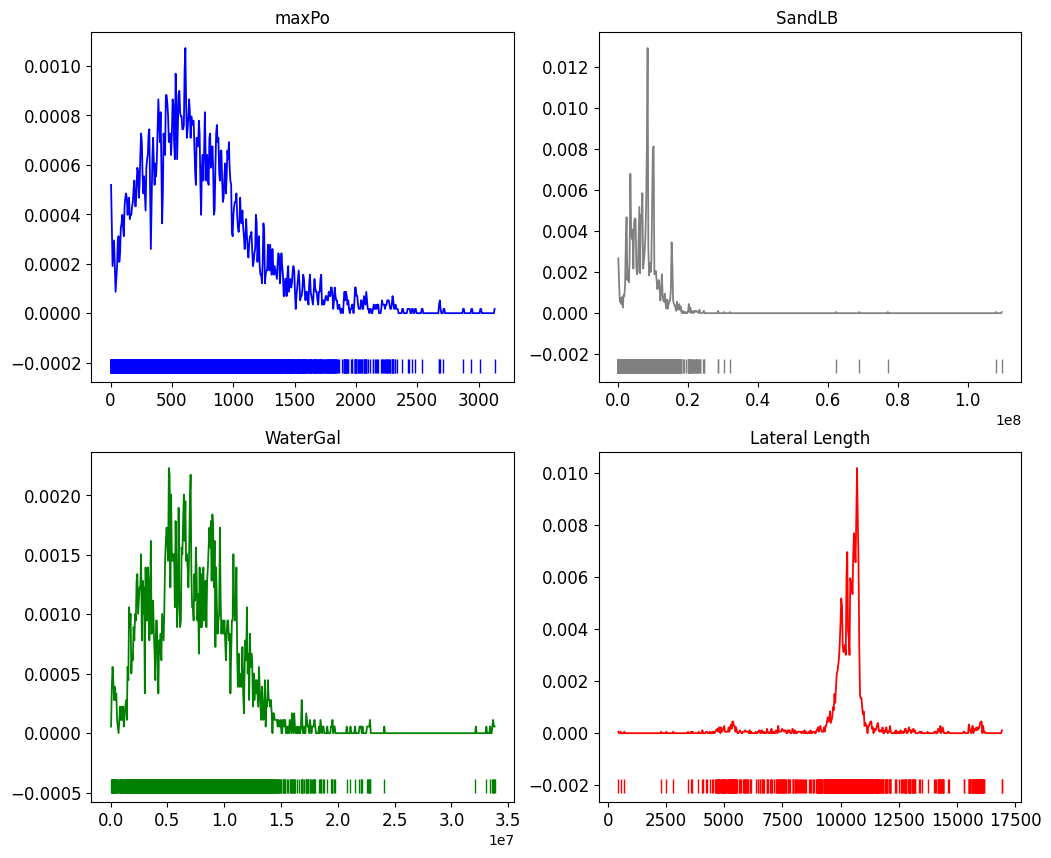

In [130]:
fig = plt.figure(figsize = (12,10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('maxPo')
az.plot_kde(data['maxPo'],textsize=12, plot_kwargs={'color': 'b'}, rug=True, bw=2)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('SandLB ')
az.plot_kde(data['SandLB'],textsize=12, plot_kwargs={'color': 'gray'}, rug=True, bw=2)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('WaterGal')
az.plot_kde(data['WaterGal'],textsize=12, plot_kwargs={'color': 'green'}, rug=True, bw=2)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Lateral Length')
az.plot_kde(data['LL'],textsize=12, plot_kwargs={'color': 'red'}, rug=True, bw=2);

In [ ]:
fig = plt.figure(figsize = (12,10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('maxPo')
az.plot_kde(sData['maxPo'],textsize=12, plot_kwargs={'color': 'b'}, rug=True, bw=2)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('SandLB')
az.plot_kde(sData['SandLB'],textsize=12, plot_kwargs={'color': 'gray'}, rug=True, bw=2)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('WaterGal')
az.plot_kde(sData['WaterGal'],textsize=12, plot_kwargs={'color': 'green'}, rug=True, bw=2)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Lateral Length')
az.plot_kde(sData['LL'],textsize=12, plot_kwargs={'color': 'red'}, rug=True, bw=2);

# **5.b Bayesian analysis - PyMC model**

In [131]:
# OLS as a baseline
ls_1 = smf.ols('maxPo ~ WaterGal + SandLB + LL ', data=sData).fit()
ls_1.summary(alpha=0.11)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  maxPo   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     114.2
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.31e-70
Time:                        21:19:39   Log-Likelihood:                -2433.4
No. Observations:                3579   AIC:                             4875.
Df Residuals:                    3575   BIC:                             4899.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.055      0.945]
------------------------------------------------------------------------------
Intercept   2.925e-16      0.008   3.66e-14      1.000      -0.013       0.013
WaterGal       0.1634      0.021      7.948      0.000       0.131       0.196
SandLB         0.1438      0.020      7.052      0.000       0.111       0.176
LL             0.0578      0.016      3.513      0.000       0.032       0.084
==============================================================================
Omnibus:                     1623.662   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14061.210
Skew:                          -1.951   Prob(JB):                         0.00
Kurtosis:                      11.892   Cond. No.                         3.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
#PyMC model Hiro3
coords = {
    "time": YEAR_uniques,
    "area": MHB_uniques,
}
with pm.Model(coords=coords) as modelHiro_v3:
# Priors
    α = pm.Normal("α", mu=0, sigma=0.1, dims="area")
    β = pm.Normal("β", mu=0, sigma=0.1, dims="area")
   #sd_α = pm.HalfStudentT("sd_α", nu=3, sigma=2.5) # global
   #α = pm.Normal("α", mu=0, sigma=sd_α, dims="area") # area-specific
   #sd_β = pm.HalfStudentT("sd_β", nu=3, sigma=2.5) # global
   #β = pm.Normal("β", mu=0, sigma=sd_β, dims="area") # area-specific

    γ = pm.GaussianRandomWalk("γ", sigma=0.1, init_dist=pm.Normal.dist(0, 0.1), dims="time")
    τ = pm.GaussianRandomWalk("τ", sigma=0.1, init_dist=pm.Normal.dist(0, 0.1), dims="time")

# Data scale
    σ = pm.HalfNormal("σ", sigma=0.1)
   #σ = pm.HalfStudentT("σ", nu=3, sigma=2.5)

# Data expectation
   #μ = α[wd.MHBn] + τ[wd.YEARn] + (γ[wd.YEARn] + β[wd.MHBn] * wd.WSLm) * wd.LL
   #Use Deterministic to memorize the expression and to track its value in the sampling trace.
    μ = pm.Deterministic("μ", α[wd.MHBn]  + τ[wd.YEARn] + (γ[wd.YEARn] + β[wd.MHBn] * wd.WSLm) * wd.LL)

# Likelihood of observed data
    likelihood = pm.Normal("maxPo", mu=μ, sigma=σ, observed=wd["maxPo"])

    traceHiro_v3 = pm.sample(draws=1000, tune=300, discard_tuned_samples=True, init='auto', chains=3, cores=3, random_seed=2022)

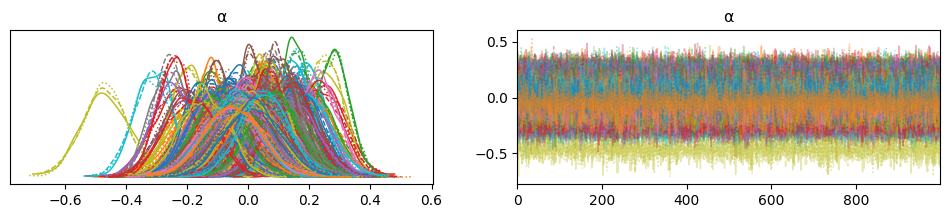

In [133]:
# The function `traceplot` from PyMC was an alias for `plot_trace` from ArviZ. It was removed in PyMC 4.0. Switch to `pymc.plot_trace` or `arviz.plot_trace`.
#pm.plot_trace(traceHiro_v3)
az.plot_trace(traceHiro_v3, var_names=["α"], compact=True);
#az.plot_trace(traceHiro_v3, var_names=["β"], compact=False);
#az.plot_trace(traceHiro_v3, var_names=["γ"], compact=False);
#az.plot_trace(traceHiro_v3, var_names=["τ"], compact=False);

In [134]:
az.summary(traceHiro_v3, var_names=["α"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α[DN78xa],0.036,0.092,-0.146,0.201,0.001,0.002,6277.0,1805.0,1.0
α[DN86iw],-0.011,0.100,-0.197,0.176,0.001,0.002,6787.0,2037.0,1.0
α[DN86ju],-0.015,0.092,-0.186,0.165,0.001,0.002,6561.0,2070.0,1.0
α[DN86jw],0.061,0.092,-0.114,0.224,0.001,0.001,5010.0,2014.0,1.0
α[DN86kw],0.007,0.094,-0.163,0.188,0.001,0.002,8405.0,1939.0,1.0
...,...,...,...,...,...,...,...,...,...
α[DN88vb],0.010,0.094,-0.165,0.183,0.001,0.002,6607.0,2040.0,1.0
α[DN88vc],0.006,0.091,-0.181,0.158,0.001,0.002,6659.0,1938.0,1.0
α[DN88vd],0.052,0.079,-0.094,0.202,0.001,0.002,5301.0,1892.0,1.0
α[DN88ve],0.016,0.095,-0.153,0.197,0.001,0.002,6614.0,1900.0,1.0


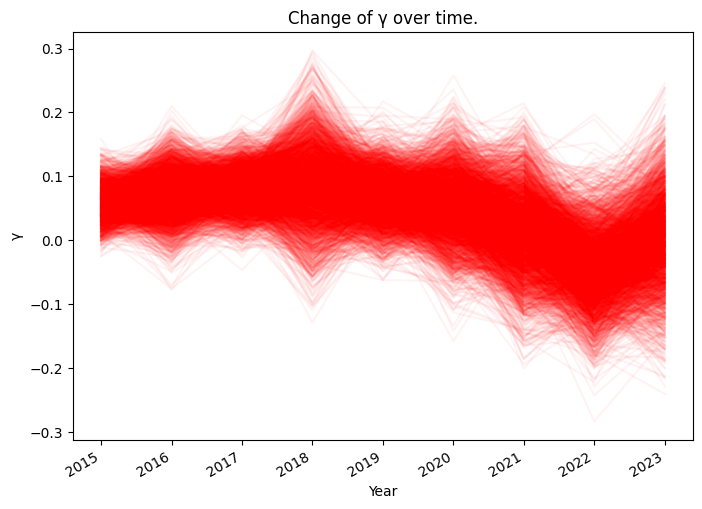

In [135]:
import matplotlib.ticker as mticker

fig = plt.figure(figsize=(8, 6), constrained_layout=False)
ax = plt.subplot(111, xlabel="Year", ylabel="γ", title="Change of γ over time.")
ax.plot(traceHiro_v3.posterior.stack(pooled_chain=("chain", "draw"))["γ"], "r", alpha=0.05)

plt.xticks(range(len(YEAR_uniques)), YEAR_uniques)

fig.autofmt_xdate()

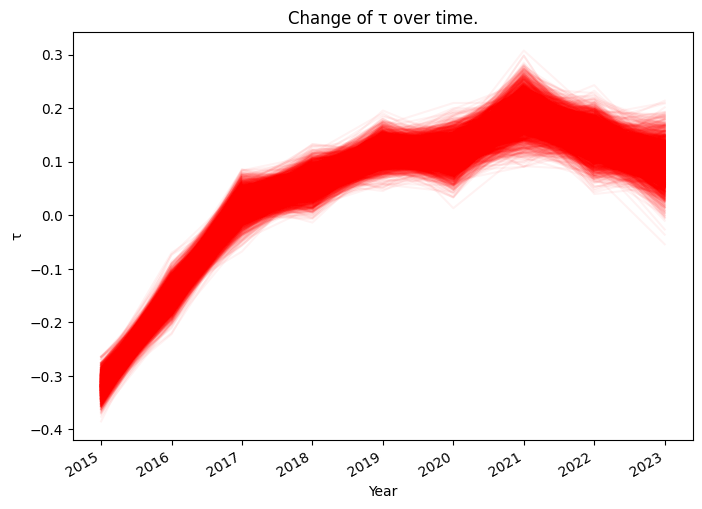

In [136]:
fig = plt.figure(figsize=(8, 6), constrained_layout=False)
ax = plt.subplot(111, xlabel="Year", ylabel="τ", title="Change of τ over time.")
ax.plot(traceHiro_v3.posterior.stack(pooled_chain=("chain", "draw"))["τ"], "r", alpha=0.05)

plt.xticks(range(len(YEAR_uniques)), YEAR_uniques)

fig.autofmt_xdate()

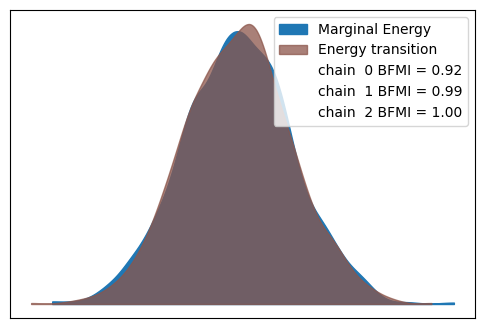

In [137]:
az.plot_energy(traceHiro_v3, figsize=(6, 4));

In [138]:
az.summary(traceHiro_v3, kind="diagnostics")

,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α[DN78xa],0.001,0.002,6277.0,1805.0,1.0
α[DN86iw],0.001,0.002,6787.0,2037.0,1.0
α[DN86ju],0.001,0.002,6561.0,2070.0,1.0
α[DN86jw],0.001,0.001,5010.0,2014.0,1.0
α[DN86kw],0.001,0.002,8405.0,1939.0,1.0
...,...,...,...,...,...
μ[3574],0.001,0.001,5642.0,2157.0,1.0
μ[3575],0.001,0.001,5642.0,2157.0,1.0
μ[3576],0.001,0.001,5638.0,2186.0,1.0
μ[3577],0.001,0.001,5636.0,2186.0,1.0


In [139]:
trace_hdi = az.hdi(traceHiro_v3)
trace_hdi["α"]

<xarray.DataArray 'α' (area: 402, hdi: 2)>
array([[-0.14557768,  0.20106642],
       [-0.19726768,  0.17606145],
       [-0.1860494 ,  0.16530587],
       [-0.11422789,  0.22397681],
       [-0.16271822,  0.18779642],
       [-0.20488817,  0.15999129],
       [-0.21156297,  0.12308517],
       [-0.16154738,  0.17737252],
       [-0.16214889,  0.17184716],
       [-0.20443057,  0.12760188],
       [-0.20628811,  0.15252591],
       [-0.22141757,  0.12812688],
       [-0.20705746,  0.17032246],
       [-0.20087272,  0.15844801],
       [-0.34601584, -0.04594517],
       [-0.22850572,  0.1271259 ],
       [-0.20456779,  0.15054544],
       [-0.17550731,  0.15184064],
       [-0.17751158,  0.16939326],
       [-0.22407353,  0.10205294],
...
       [-0.06944434,  0.22645267],
       [-0.3339747 , -0.04253041],
       [-0.18805259,  0.17323552],
       [-0.20135104,  0.13685054],
       [-0.18556641,  0.16557615],
       [-0.13285636,  0.22530848],
       [-0.2955749 ,  0.00179686],
       [-0.22241416,  0.10948973],
       [-0.18729265,  0.1644363 ],
       [-0.21422307,  0.15862767],
       [-0.19509395,  0.1452592 ],
       [-0.1498852 ,  0.18155281],
       [-0.19297939,  0.13758624],
       [-0.17889846,  0.18218594],
       [-0.24885352,  0.12994355],
       [-0.16468644,  0.18325605],
       [-0.18144677,  0.15842646],
       [-0.09366666,  0.20165995],
       [-0.15337973,  0.1971119 ],
       [-0.21219313,  0.14030577]])
Coordinates:
  * area     (area) <U6 'DN78xa' 'DN86iw' 'DN86ju' ... 'DN88ve' 'DN88wa'
  * hdi      (hdi) <U6 'lower' 'higher'

In [140]:
traceHiro_v3.posterior["α"].median(("chain", "draw"))

<xarray.DataArray 'α' (area: 402)>
array([ 3.56004518e-02, -1.22820317e-02, -1.43494904e-02,  6.13116450e-02,
        6.47873608e-03, -1.02519469e-02, -5.57416523e-02,  2.96944485e-03,
        3.63818939e-03, -3.11612381e-02, -1.23137013e-02, -3.89746141e-02,
       -2.61700554e-02, -2.51562504e-02, -1.97636254e-01, -5.95036285e-02,
       -1.60986729e-02, -9.89811481e-03, -1.58128446e-02, -5.94538057e-02,
        3.19721138e-02, -1.83561760e-01, -1.16479378e-01, -7.88036547e-02,
       -2.13904806e-02, -4.45898501e-02,  5.87149299e-02, -5.76519412e-02,
        1.59777348e-02, -1.11716838e-02, -2.13179895e-03, -1.09839101e-02,
        1.55633030e-02,  4.66579043e-02, -2.63926744e-02,  5.77618139e-02,
        8.37170599e-03,  1.87712382e-01, -5.07052020e-02,  1.04701773e-02,
       -7.58911569e-02,  2.14626680e-02,  1.52076775e-01, -1.02297888e-01,
        1.39193033e-01,  5.07303705e-02,  5.86780010e-02,  8.03463582e-02,
        4.23963890e-02,  4.40245867e-02,  6.66271689e-02, -1.63135413e-01,
       -4.45626485e-02, -1.08329340e-01,  2.41427597e-02,  3.61134336e-02,
       -7.92910641e-03, -9.03782665e-03,  3.42741174e-03,  7.50359491e-02,
        3.83638618e-02,  4.43026878e-02,  4.57371679e-02,  1.13020201e-01,
       -3.48613406e-03,  7.01825360e-02, -2.31364863e-02,  2.63475657e-02,
        5.64822436e-02, -2.42391976e-02, -1.43404005e-01,  2.03524131e-01,
        3.23212598e-02,  6.13830127e-02, -8.76444676e-02,  1.54018585e-01,
       -3.73500240e-02, -4.49855722e-03, -6.08189846e-02,  5.11745649e-02,
...
       -1.17686070e-01, -7.86985932e-03, -3.18926083e-02, -8.47266359e-02,
        6.95476199e-02,  5.19823074e-02, -1.59877121e-02,  3.65748264e-03,
       -5.98771128e-02, -2.41064708e-01, -1.19978622e-01,  4.95179460e-03,
        9.89740606e-03,  1.17529193e-01,  3.76845791e-02,  2.19527047e-02,
       -1.18046297e-01, -7.46995392e-02, -3.50385246e-02,  1.40706815e-01,
        3.88437253e-03,  1.19863352e-01, -4.31741167e-02, -3.55714314e-03,
       -7.50631511e-03, -5.03406406e-02, -4.93191603e-02, -1.46482635e-02,
        9.72397623e-02,  5.37878084e-02,  1.34498441e-01,  9.69965713e-02,
       -5.89393985e-03, -1.92165145e-02,  4.82411708e-04,  3.95702678e-03,
       -1.42427152e-01, -1.62918848e-02, -1.87472890e-02, -2.96899110e-02,
        2.74773195e-02,  4.71378911e-02, -1.19741909e-02,  9.37132899e-02,
        1.36275880e-02, -5.38731599e-02, -2.67037401e-02,  4.74231523e-03,
       -9.81722126e-02, -2.01590119e-02, -6.06657636e-04, -7.10372342e-02,
       -6.59289059e-02, -6.14335726e-02, -2.99694325e-02, -4.26955701e-02,
        4.28422395e-02,  2.12616657e-02,  8.29376235e-02, -1.88268641e-01,
       -2.95729249e-03, -3.40087137e-02, -1.39543297e-02,  4.63284609e-02,
       -1.44355084e-01, -5.04041207e-02, -1.23755790e-02, -3.42804517e-02,
       -2.46378730e-02,  2.17993734e-02, -2.43618144e-02, -3.27856672e-03,
       -5.09060298e-02,  1.18427939e-02,  6.91602165e-03,  5.23885535e-02,
        1.61115758e-02, -4.95492313e-02])
Coordinates:
  * area     (area) <U6 'DN78xa' 'DN86iw' 'DN86ju' ... 'DN88ve' 'DN88wa'

/usr/local/lib/python3.10/dist-packages/arviz/plots/plot_utils.py:271: UserWarning:

rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (402) in plot_posterior, generating only 40 plots



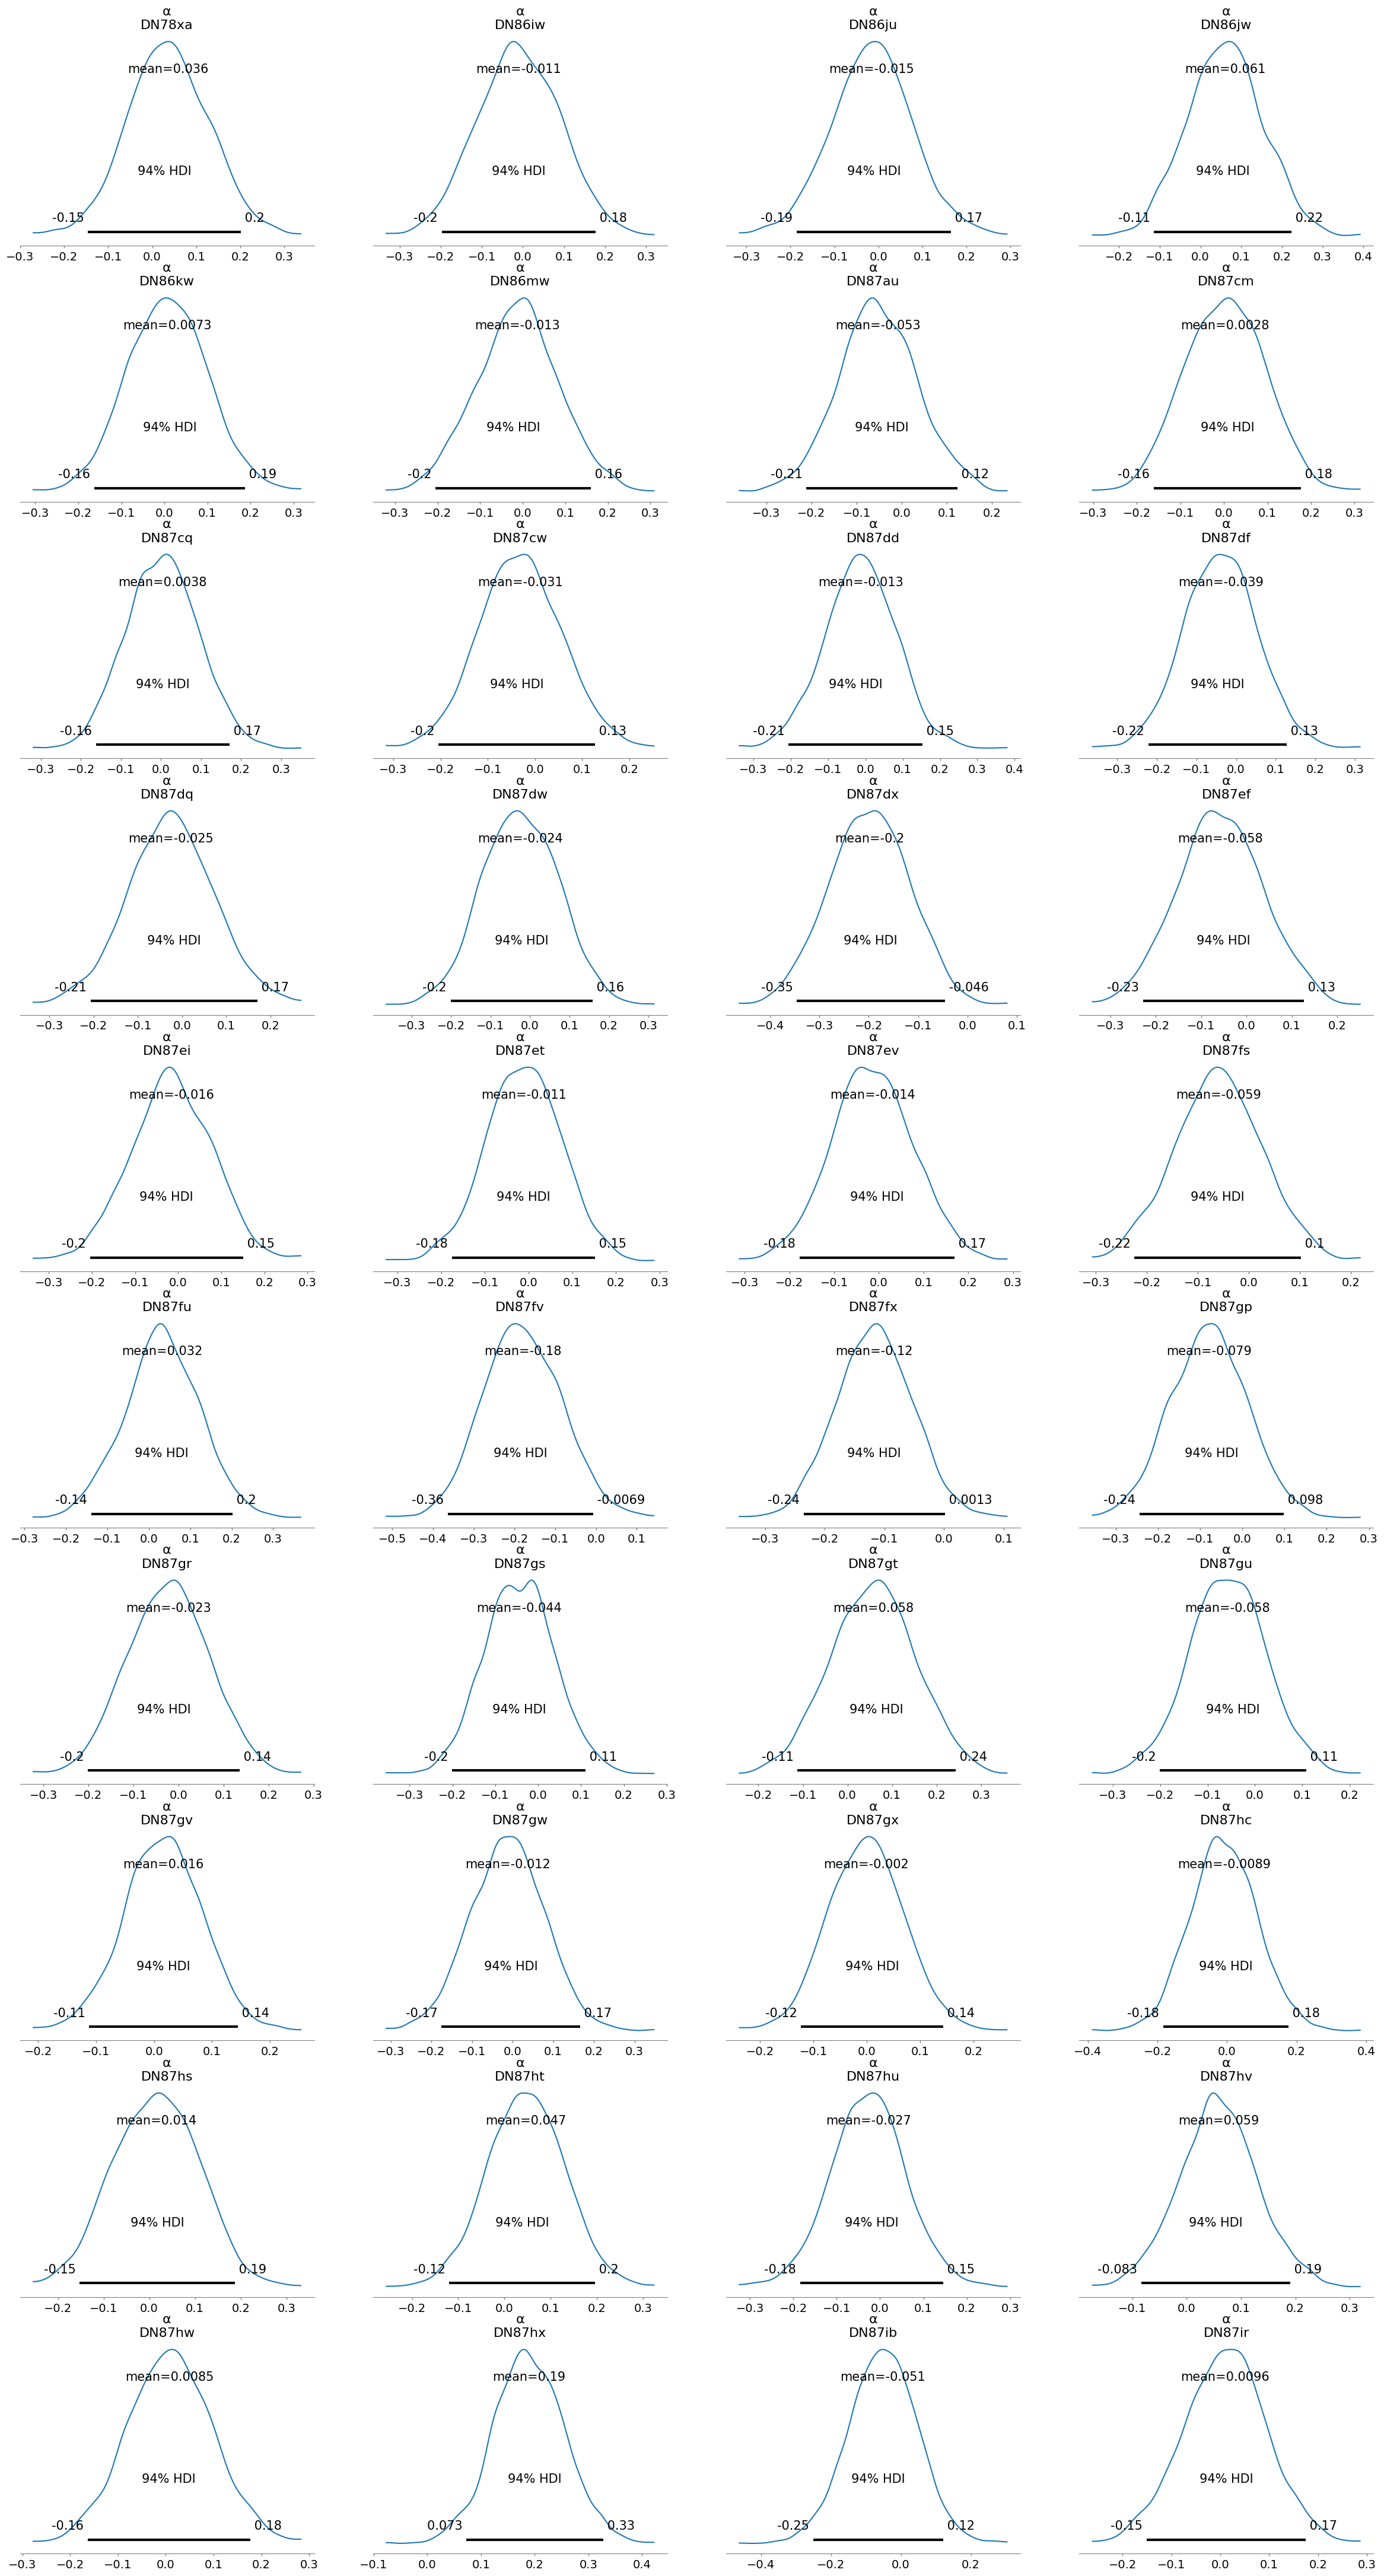

In [141]:
az.plot_posterior(traceHiro_v3, var_names=["α"]);

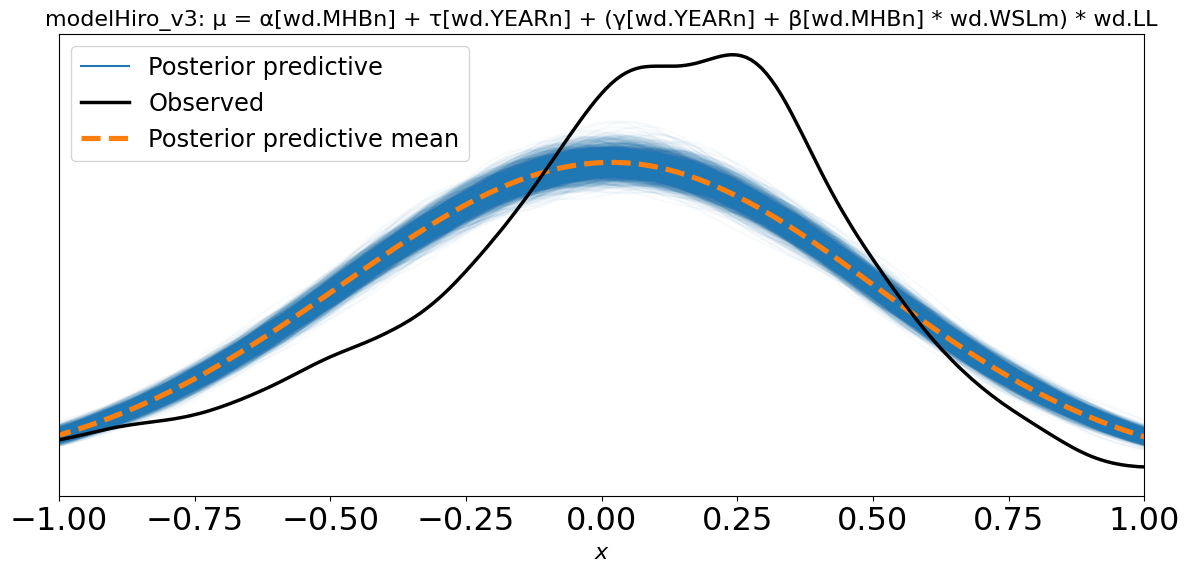

In [142]:
ppc_avg = pm.sample_posterior_predictive(trace=traceHiro_v3, model=modelHiro_v3)
az.plot_ppc(ppc_avg, alpha=0.03, figsize=(14, 6)) #, backend="bokeh")
plt.xlim(-1, 1)
plt.title("modelHiro_v3: μ = α[wd.MHBn] + τ[wd.YEARn] + (γ[wd.YEARn] + β[wd.MHBn] * wd.WSLm) * wd.LL", fontsize=16)
plt.xlabel('$x$', fontsize=16);

In [143]:
az.r2_score(np.array(wd.maxPo), ppc_avg.posterior_predictive.maxPo[0,:,:].values)

r2        0.393020
r2_std    0.006657
dtype: float64

In [144]:
with modelHiro_v3:
    modelHiro_v3_idata = pm.sample_prior_predictive(1000)

modelHiro_v3_idata

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

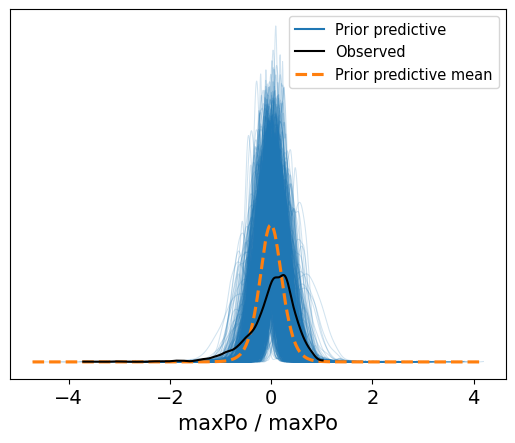

In [145]:
az.plot_ppc(modelHiro_v3_idata, group="prior");

In [146]:
with modelHiro_v3:
    idata_aux = pm.sample()

modelHiro_v3_idata.extend(idata_aux)

In [ ]:
az.plot_pair(modelHiro_v3_idata);

In [147]:
#Posterior predictive
with modelHiro_v3:
    pm.sample_posterior_predictive(modelHiro_v3_idata, extend_inferencedata=True)

In [148]:
estData=az.summary(traceHiro_v3, var_names=["α"], fmt='wide' )

In [149]:
estData.head()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α[DN78xa],0.036,0.092,-0.146,0.201,0.001,0.002,6277.0,1805.0,1.0
α[DN86iw],-0.011,0.100,-0.197,0.176,0.001,0.002,6787.0,2037.0,1.0
α[DN86ju],-0.015,0.092,-0.186,0.165,0.001,0.002,6561.0,2070.0,1.0
α[DN86jw],0.061,0.092,-0.114,0.224,0.001,0.001,5010.0,2014.0,1.0
α[DN86kw],0.007,0.094,-0.163,0.188,0.001,0.002,8405.0,1939.0,1.0


In [150]:
estAlfa = estData[['mean']].reset_index()
estAlfa.head()

In [151]:
data2.maxPo.std()

0.8396347526676575

In [152]:
data2.maxPo.mean()

6.336914873860415

In [153]:
estAlfa['expPo'] = estAlfa['mean'] * data2.maxPo.std() * 2 + data2.maxPo.mean()
estAlfa.head(2)

,index,mean,expPo
0,α[DN78xa],0.036,6.397369
1,α[DN86iw],-0.011,6.318443


In [154]:
estAlfa['expPo'] = np.exp(estAlfa['expPo'])
estAlfa.head(2)

,index,mean,expPo
0,α[DN78xa],0.036,600.263410
1,α[DN86iw],-0.011,554.708588


In [155]:
estDataT=az.summary(traceHiro_v3, var_names=["τ"], fmt='wide' )
estDataT

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
τ[2015],-0.319,0.018,-0.354,-0.287,0.000,0.0,5073.0,2403.0,1.0
τ[2016],-0.148,0.020,-0.186,-0.112,0.000,0.0,4196.0,2520.0,1.0
τ[2017],0.019,0.023,-0.023,0.063,0.000,0.0,3921.0,2246.0,1.0
τ[2018],0.061,0.022,0.023,0.107,0.000,0.0,4024.0,2330.0,1.0
τ[2019],0.119,0.021,0.081,0.158,0.000,0.0,3772.0,2334.0,1.0
τ[2020],0.115,0.026,0.067,0.165,0.000,0.0,4997.0,2695.0,1.0
τ[2021],0.193,0.032,0.136,0.256,0.001,0.0,3885.0,2285.0,1.0
τ[2022],0.140,0.029,0.089,0.198,0.000,0.0,4597.0,2520.0,1.0
τ[2023],0.096,0.034,0.030,0.157,0.001,0.0,4055.0,2330.0,1.0


In [156]:
estTau = estDataT[['mean']].reset_index()
estTau['cyPo'] = estTau['mean'] * data2.maxPo.std() * 2 + data2.maxPo.mean()
estTau

,index,mean,cyPo
0,τ[2015],-0.319,5.801228
1,τ[2016],-0.148,6.088383
2,τ[2017],0.019,6.368821
3,τ[2018],0.061,6.439350
4,τ[2019],0.119,6.536748
5,τ[2020],0.115,6.530031
6,τ[2021],0.193,6.661014
7,τ[2022],0.140,6.572013
8,τ[2023],0.096,6.498125


In [157]:
estTau['cyPo'] = np.exp(estTau['cyPo'])
estTau

,index,mean,cyPo
0,τ[2015],-0.319,330.705384
1,τ[2016],-0.148,440.708204
2,τ[2017],0.019,583.369627
3,τ[2018],0.061,625.999964
4,τ[2019],0.119,690.038881
5,τ[2020],0.115,685.419368
6,τ[2021],0.193,781.342730
7,τ[2022],0.140,714.807020
8,τ[2023],0.096,663.895493


In [158]:
t2a = estTau['cyPo'][0]
t2a

330.7053843923348

In [159]:
estTau['acyPo'] = estTau['cyPo']-t2a
estTau

,index,mean,cyPo,acyPo
0,τ[2015],-0.319,330.705384,0.000000
1,τ[2016],-0.148,440.708204,110.002819
2,τ[2017],0.019,583.369627,252.664243
3,τ[2018],0.061,625.999964,295.294580
4,τ[2019],0.119,690.038881,359.333496
5,τ[2020],0.115,685.419368,354.713984
6,τ[2021],0.193,781.342730,450.637346
7,τ[2022],0.140,714.807020,384.101636
8,τ[2023],0.096,663.895493,333.190108


In [160]:
estAlfa['estPo'] = estAlfa['expPo'] + t2a
estAlfa.head(2)

,index,mean,expPo,estPo
0,α[DN78xa],0.036,600.263410,930.968795
1,α[DN86iw],-0.011,554.708588,885.413972


In [161]:
estAlfa['MHB'] = estAlfa['index'].str.extract(r"\[(.*?)\]", expand=False)
estAlfa.head()

,index,mean,expPo,estPo,MHB
0,α[DN78xa],0.036,600.263410,930.968795,DN78xa
1,α[DN86iw],-0.011,554.708588,885.413972,DN86iw
2,α[DN86ju],-0.015,550.995053,881.700438,DN86ju
3,α[DN86jw],0.061,625.999964,956.705348,DN86jw
4,α[DN86kw],0.007,571.731663,902.437047,DN86kw


In [162]:
maxPoe = estAlfa['estPo'].max()
maxPoe

1231.9275431770832

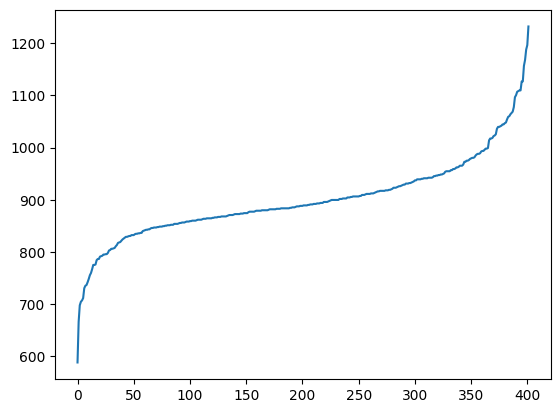

In [163]:
estAlfa['estPo'].sort_values().reset_index(drop=True).plot();

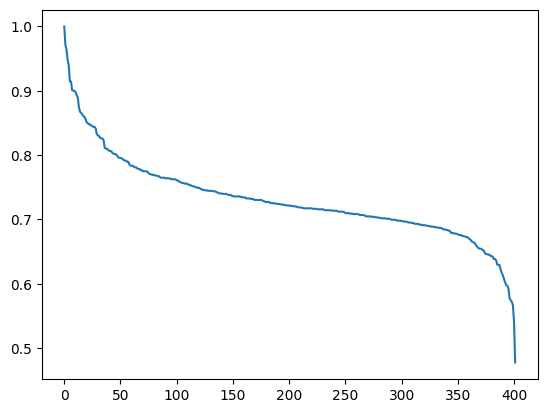

In [165]:
estAlfa['coreIdx'] = estAlfa['estPo']/maxPoe
#estAlfa['coreIdx'].sort_values().reset_index(drop=True).plot();  #(ascending=True)
estAlfa['coreIdx'].sort_values(ascending=False).reset_index()['coreIdx'].plot();

In [166]:
estAlfa.to_csv('BakkenEstCoAlfaLog.csv')
files.download('BakkenEstCoAlfaLog.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>